In [393]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [414]:
class SGD:
    
    def inicializar_param(self):
        #return 1 / self.n_params#np.random.RandomState(self.random_seed).uniform(low=0.0, high=1.0)
        return np.random.uniform(low=0.0, high=1.0)
    
    @staticmethod
    def sigmoid(x):
        return 1 / (1 + math.exp(-x))

    def __init__(self):
        self.n_params = 9
        self.W = np.empty([self.n_params, 1], dtype=float)
        self.grad_W = np.empty([self.n_params, 1], dtype=float)
        self.lista_mse = []
        self.tip_y_hat =None
        
    def inicializar_parametros(self):
        #Inicializar parametros
        w11_l1 = self.inicializar_param()
        w12_l1 = self.inicializar_param()
        b1_l1 = self.inicializar_param()
        w21_l1 = self.inicializar_param()
        w22_l1 = self.inicializar_param()
        b2_l1 = self.inicializar_param()
        w11_l2 = self.inicializar_param()
        w12_l2 = self.inicializar_param()
        b1_l2 = self.inicializar_param()
        
        self.W = np.array([w11_l1,w12_l1,b1_l1,w21_l1,w22_l1,b2_l1,w11_l2,w12_l2,b1_l2])
        
        
    def fit(self,X,y,epochs=100,lr=0.1):
        n = X.shape[0]
        self.tip_y_hat = y.dtype
        y_hat = np.empty(y.shape, dtype=float)
        self.inicializar_parametros()
        self.lista_mse = []
        for ep in range(epochs):
            for i in range(n):
                #1- Calculo el forward
                #Capa 1 - neurona 1
                zi1_l1 = X[i,0]*self.W[0] + X[i,1]*self.W[1] + self.W[2]
                ai1_l1 = SGD.sigmoid(zi1_l1)
                #Capa 1 - neurona 2
                zi2_l1 = X[i,0]*self.W[3] + X[i,1]*self.W[4] + self.W[5]
                ai2_l1 = SGD.sigmoid(zi2_l1)
                #Capa 2 - neurona 1
                zi1_l2 = ai1_l1*self.W[6] + ai2_l1*self.W[7] + self.W[8]
                y_hat[i] = zi1_l2
                #2- Calculo el error
                erri = y[i] - y_hat[i] 
                #3 backpropagation
                # Capa 2
                der_b1_l2 = -2*erri
                der_w11_l2 = der_b1_l2 * ai1_l1
                der_w12_l2 = der_b1_l2 * ai2_l1
                # Capa 1
                # -2 * err(i) * w11_l2 * sigmoid(zi1_l1) * (1- sigmoid(zi1_l1))
                der_b1_l1 = -2*erri*self.W[6]*SGD.sigmoid(zi1_l1)*(1-SGD.sigmoid(zi1_l1))
                der_w11_l1 = der_b1_l1 * X[i,0]
                der_w12_l1 = der_b1_l1 * X[i,1]
                # -2 * err(i) * w12_l2 * sigmoid(zi2_l1) * (1- sigmoid(zi2_l1))
                der_b2_l1 = -2*erri*self.W[7]*SGD.sigmoid(zi2_l1)*(1-SGD.sigmoid(zi2_l1))
                der_w21_l1 = der_b2_l1 * X[i,0]
                der_w22_l1 = der_b2_l1 * X[i,1]
                
                self.grad_W = np.array([der_w11_l1,der_w12_l1,der_b1_l1,der_w21_l1,der_w22_l1,der_b2_l1,der_w11_l2,der_w12_l2,der_b1_l2])
                #4 Actualizo los pesos
                self.W = self.W  - lr* self.grad_W 
                
            mse = np.sum((y-y_hat)**2) / y.size
            self.lista_mse.append(mse)
            #if mse == 0:
            #    return
            
        
    def predict(self,X):
        n = X.shape[0]
        y_hat = np.empty((n,1), dtype=self.tip_y_hat)#float
        for i in range(n):
            #1- Calculo el forward
            #Capa 1 - neurona 1
            zi1_l1 = X[i,0]*self.W[0] + X[i,1]*self.W[1] + self.W[2]
            ai1_l1 = SGD.sigmoid(zi1_l1)
            #Capa 1 - neurona 2
            zi2_l1 = X[i,0]*self.W[3] + X[i,1]*self.W[4] + self.W[5]
            ai2_l1 = SGD.sigmoid(zi2_l1)
            #Capa 2 - neurona 1
            zi1_l2 = ai1_l1*self.W[6] + ai2_l1*self.W[7] + self.W[8]
            y_hat[i] = round(zi1_l2,0)
        return y_hat    
    

## Genero objeto SGD, datos de entrada (X) y salida (y). Hago fit del modelo

In [415]:
sgd = SGD()

In [416]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,0])
sgd.fit(X,y,epochs=10000,lr=0.5)

### Vemos los parametros W calculados por el modelo

In [417]:
sgd.W

array([-4.75259922,  3.15957832, -2.90960367,  2.36469093, -2.09932602,
       -1.04476377,  2.88958832,  2.17034654, -0.71412973])

### Hacemos el predict con los valores de X

In [418]:
y_predict = sgd.predict(X)
print(y_predict)

[[0]
 [1]
 [1]
 [0]]


In [419]:
#np.testing.assert_allclose(y.astype(np.float32).reshape(-1,1),y_predict)

In [421]:
print("Minimo MSE obtenido: ",np.min(sgd.lista_mse))

Minimo MSE obtenido:  5.238529448733282e-32


### Grafico el MSE versus la cantidad de epochs

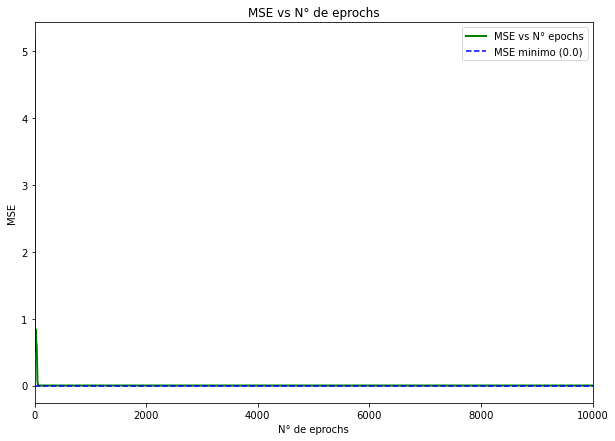

In [422]:
plt.figure(figsize=(10,7))
plt.plot(sgd.lista_mse, color='g', lw=2)
plt.xlabel('N° de eprochs')
plt.ylabel('MSE')
plt.xlim(0, len(sgd.lista_mse))
plt.axhline(np.min(sgd.lista_mse), c='b', linestyle='--')
leyenda_mse = "MSE minimo (" +str(round(np.min(sgd.lista_mse),3)) + ")"
plt.legend(("MSE vs N° epochs",leyenda_mse))
plt.title("MSE vs N° de eprochs")
plt.show();



### Analizo diferentes learning rates y cantidad de epochs

In [423]:
lista_epochs = [2,10,100,1000,10000]
lista_lr = [0.5,0.1,0.01,0.001]


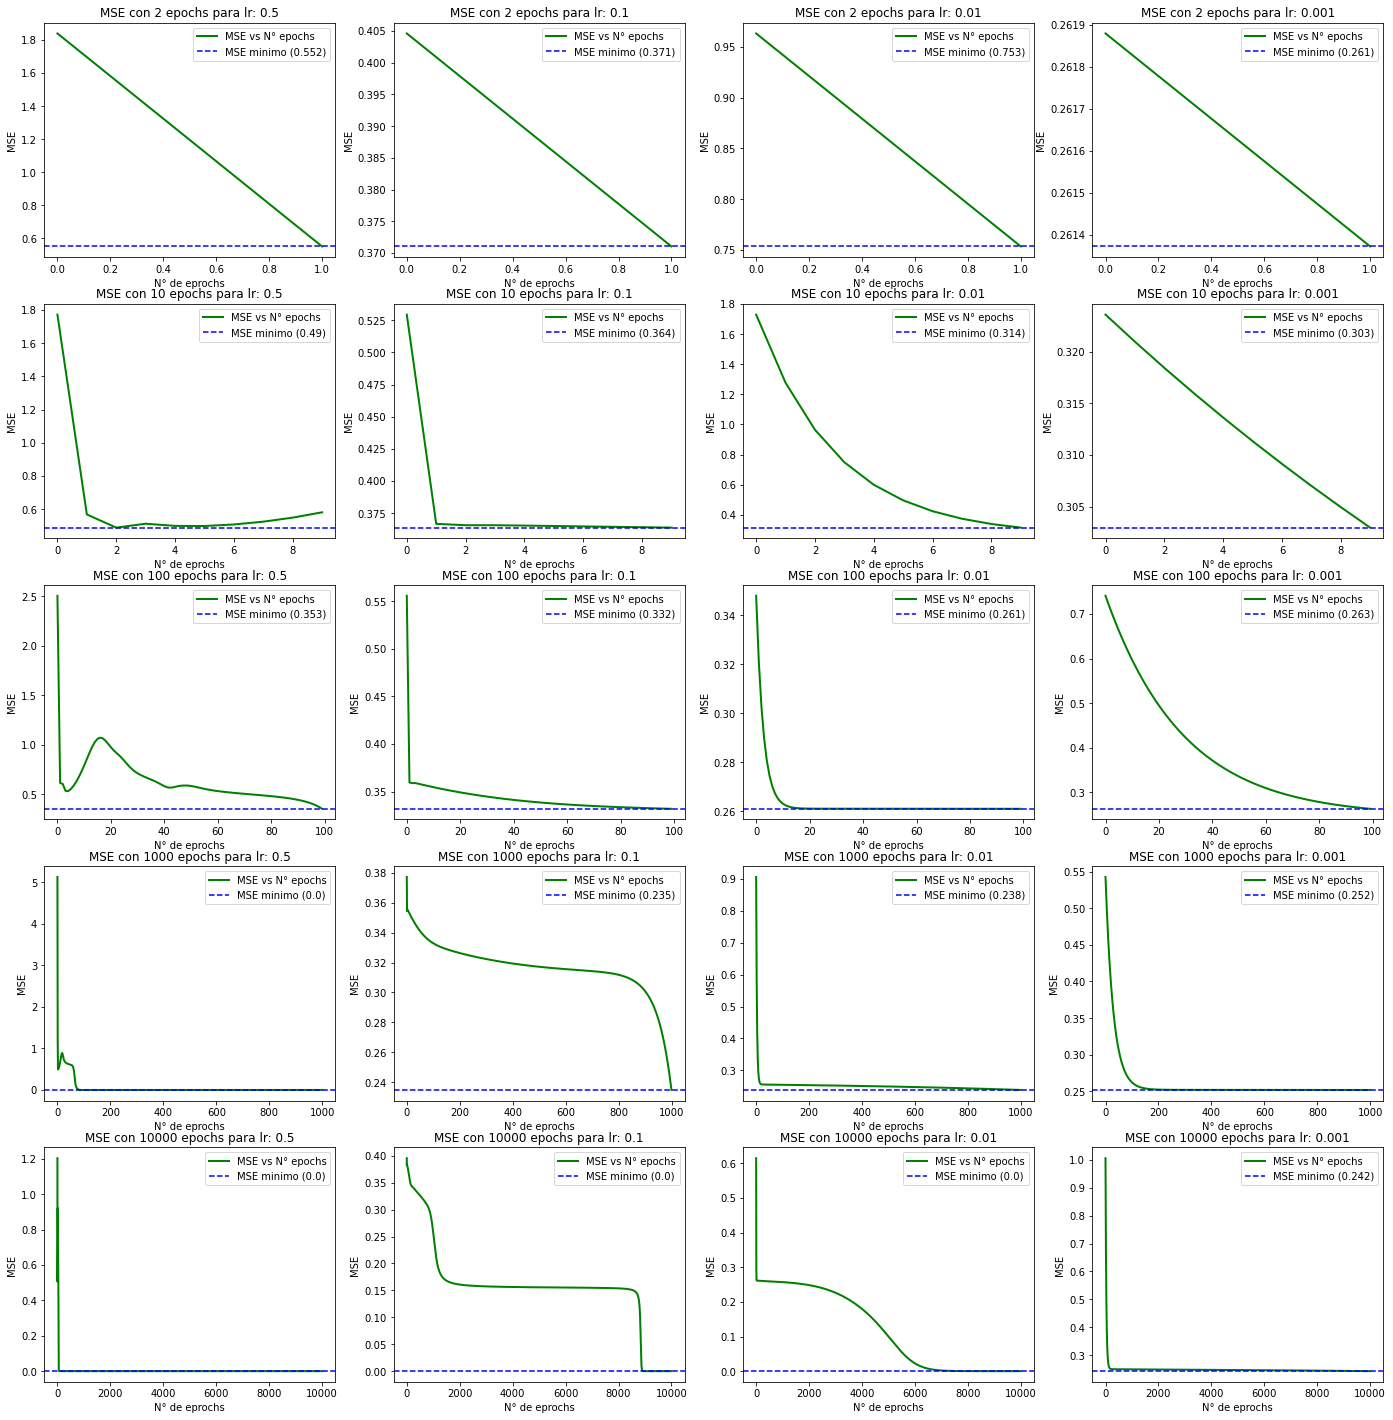

In [424]:
plt.figure(figsize=(24,25))
cant_lineas = len(lista_epochs)
cant_cols = len(lista_lr)
i = 0
for ep in lista_epochs:
    for lrs in lista_lr:
        i += 1
        plt.subplot(cant_lineas,cant_cols,i);
        sgd.fit(X,y,epochs=ep,lr=lrs)
        plt.plot(sgd.lista_mse, color='g', lw=2)
        plt.xlabel('N° de eprochs')
        plt.ylabel('MSE')
        plt.axhline(np.min(sgd.lista_mse), c='b', linestyle='--')
        leyenda_mse = "MSE minimo (" +str(round(np.min(sgd.lista_mse),3)) + ")"
        plt.legend(("MSE vs N° epochs",leyenda_mse))
        titulo = "MSE con "+str(ep)+" epochs para lr: "+str(lrs)
        plt.title(titulo)